## Introduction to regression with Neural Networks in TensorFlow


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
import numpy as np
np.__version__

'1.23.5'

## Creating some data to view and fit

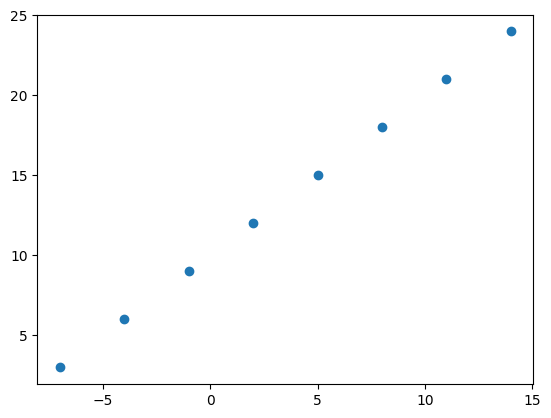

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.]).reshape(-1,1)

#create labels
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.]).reshape(-1,1)

# visualise the data
plt.scatter(X,y);

In [ ]:
y == X + 10 # this is the realtion between X and y

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Input and output shapes

In [ ]:
# Create a demo tensor for house price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((1,), (1,))

The output of this is none as this is a scalar list so ndim = 0

In [ ]:
X[0].ndim

1

In [ ]:
X[0], y[0]

(array([-7.]), array([3.]))

In [ ]:
# turn np arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

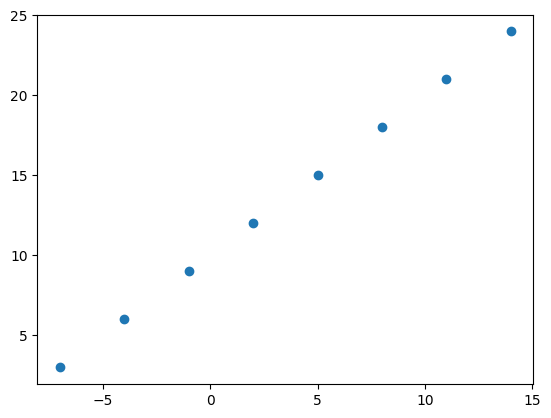

In [ ]:
plt.scatter(X,y)

## Steps in modelling with tensorflow

1. **Creating a model** - define input and output layers aswell as the hidden layer of the deep learning model
2. **Compiling the model**- define the loss function(function that tell the model how wrong the answer is) and the optimizer (tell the model how to improve its prediction).
3. **Fitting the model** - letting the model try to find patterns between X and predict y
4. **Evaluating the model** - seeing how correct the model predictions are compared to the actual data

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model (using loss = mean absolute error and optimizer = stochastic gradient decent)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 9.3438 - mae: 9.3438
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 9.2113 - mae: 9.2113
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 9.0788 - mae: 9.0788
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 8.9463 - mae: 8.9463
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 8.8138 - mae: 8.8138


In [ ]:
# check out X and y
X , y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
# try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 148ms/step


array([[23.212479]], dtype=float32)

### Improving the model
We can improve the model by altering the steps we took to create the model

1. **Creating the model** - here we may add more layer, increase the number of hidden layers, change the activation function for each layer
2. **Compiling the model** - here we might change the optimization function or perhaps the **learning rate** in the optimization function
3. **Fitting the model** - here we can change the **epochs**(leave it for training longer) or give more data


In [ ]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model (using loss = mean absolute error and optimizer = stochastic gradient decent)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 790ms/step - loss: 14.6805 - mae: 14.6805
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 14.5480 - mae: 14.5480
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4155 - mae: 14.4155
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 14.2830 - mae: 14.2830
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1505 - mae: 14.1505
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 14.0180 - mae: 14.0180
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 13.8855 - mae: 13.8855
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 13.7530 - mae: 13.7530
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 13.6205 - mae: 13.6205
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 13.4880 - mae: 13.4880
Epoch 11/100
1/1 [==============================]

In [ ]:
# try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 93ms/step


array([[29.671244]], dtype=float32)

In [ ]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model (using loss = mean absolute error and optimizer = stochastic gradient decent)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(lr=0.001),
    metrics=['mae']
)

# 3. Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 862ms/step - loss: 13.9267 - mae: 13.9267
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 13.4120 - mae: 13.4120
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8983 - mae: 12.8983
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 12.3827 - mae: 12.3827
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 11.8628 - mae: 11.8628
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 11.3357 - mae: 11.3357
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 10.7988 - mae: 10.7988
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 10.2493 - mae: 10.2493
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 9.6844 - mae: 9.6844
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 9.1012 - mae: 9.1012
Epoch 11/100
1/1 [==============================] - 

In [ ]:
# try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 91ms/step


array([[30.41065]], dtype=float32)

In [ ]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

### Evaluating the model

It's a good idea to visualize:
* the data - what it looks like
* the model itself
* the training of the model
* the prediction of the model

In [ ]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

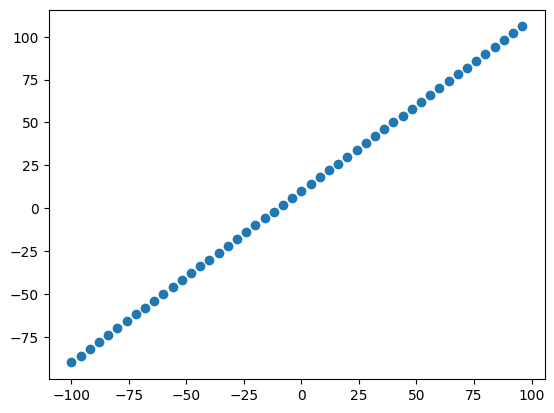

In [ ]:
# visualize the data
plt.scatter(X, y)

### The three sets:
1. Training set - model learns from this data,
typically 70-80% of the data
2. Validation set- the models gets tuned on this data, this is typically 10-15% of the data
3. Testing set - the models gets evaluated on this data, again 10-15% of the data

In [ ]:
# check the lenght of the samples we have
len(X)

50

In [ ]:
# splitting the data into train and test sets
X_train = X[:40] #first 40 samples i.e. 80% of the data
X_test = X[40:]

y_train = y[:40] #first 40 samples i.e. 80% of the data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

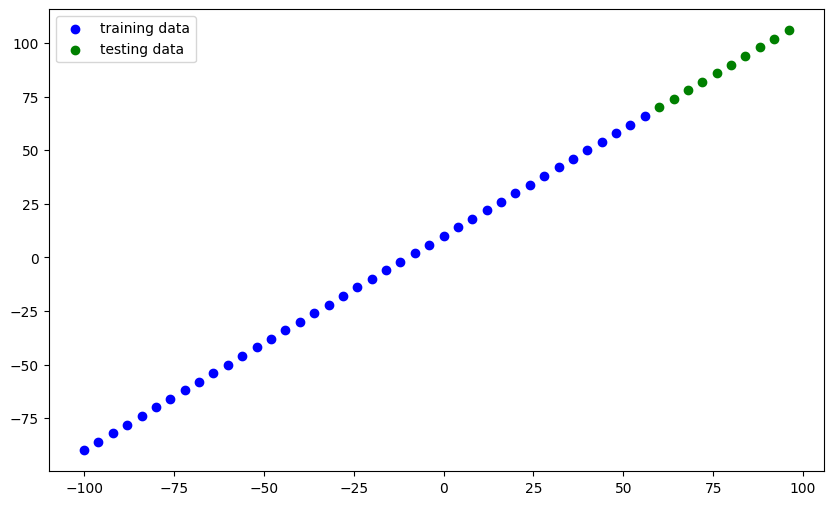

In [ ]:
# visualing the data after splitting
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,c='b',label="training data")
plt.scatter(X_test,y_test,c='g',label="testing data")
plt.legend();

In [ ]:
# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    # tf.keras.layers.Dense(1,)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# fit the model
# model.fit(X_train,y_train,epochs=100)

In [ ]:
# model.summary() # this one wil not work as model does not know what type of input it will recieve

In [ ]:
# Let's create a model which build automatically by defining the input_shape argument
tf.random.set_seed(42)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input-layer"),
    tf.keras.layers.Dense(1, name="output-layer"),
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output-layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parametes in the model (how many patterns the model it going to learn)
* **Trainable parameters** - these parameters (patterns) the model can update as it trains
* **Non-trainable params** - these are not trained/updated as these are already learnt patters that do not need updation in case of *transfer learning*

In [ ]:
# fit the model
model.fit(X_train,y_train,epochs=100, verbose=0)

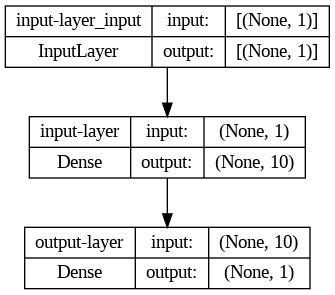

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualising the models predictions

Plot predicted values vs actual values

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 80ms/step


array([[ 78.18895 ],
       [ 83.28366 ],
       [ 88.37838 ],
       [ 93.4731  ],
       [ 98.567825],
       [103.66254 ],
       [108.75725 ],
       [113.85197 ],
       [118.946686],
       [124.04141 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# creating a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to the ground truth labels
  """

  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #plot training data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  #plot training data in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  #show legends
  plt.legend();

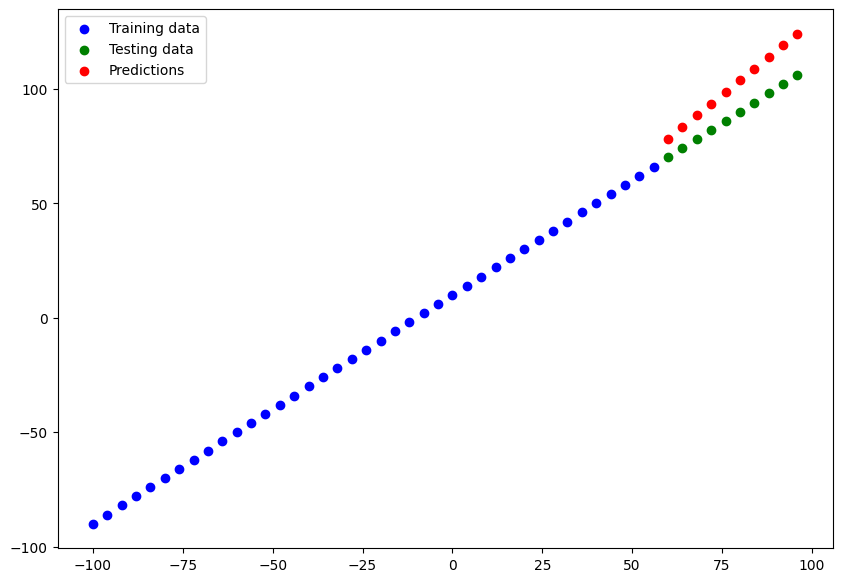

In [ ]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evalution Metrics with regression evaluation meterics

Two of the main metrics are ->
1. **MAE** (Mean Absolute Error)
2. **MSE** (Mean Squared Error)

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 221ms/step - loss: 13.1152 - mae: 13.1152


[13.1151762008667, 13.1151762008667]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_true=y_test,
                                           y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.115176>

In [ ]:
# Calculate the mean squared error
mse = tf.keras.metrics.mean_squared_error(y_true=y_test,
                                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=181.89471>

In [ ]:
tf.constant(y_pred) #shape has ( ,1) so we need to remove that to compare

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.18895 ],
       [ 83.28366 ],
       [ 88.37838 ],
       [ 93.4731  ],
       [ 98.567825],
       [103.66254 ],
       [108.75725 ],
       [113.85197 ],
       [118.946686],
       [124.04141 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# make some helper functions to use mae and mse
def mae(y_true,y_pred):
  return tf.keras.metrics.mean_absolute_error(y_true=y_test,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.keras.metrics.mean_squared_error(y_true=y_test,
                                          y_pred=tf.squeeze(y_pred))

#### Running experiments to improve the model

1.  Get more data - for the model to train on (more opportunity to learn patterns in data)
2.  Make model larger - (using a more complex model) - adding more neurons or more layers
3. Run model for longer - increase epoch


Lets do 3 modelling experiments:
1. `model_1` - same as original , 100 epochs
2. `model_2` - 2 layers, 100 epochs
3. `model_3` - 2 layers, 500 epochs

**Build model_1**

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# run the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 156ms/step


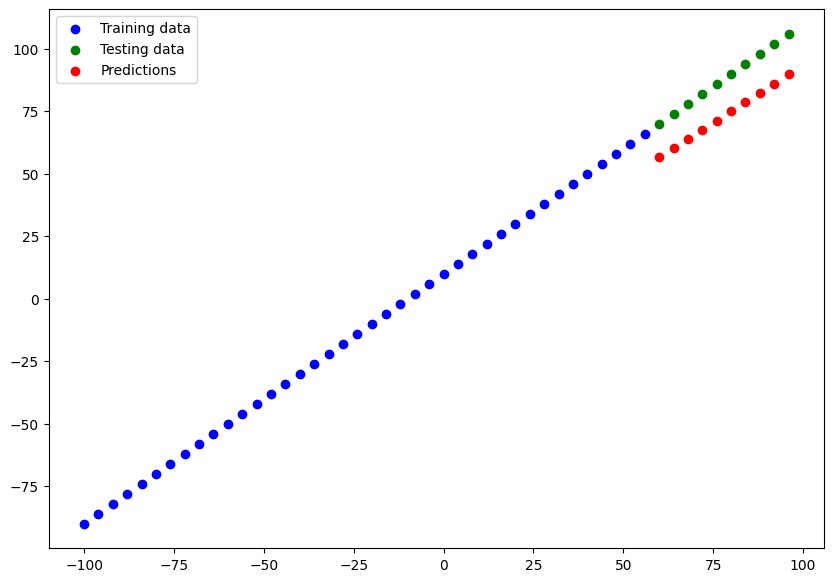

In [ ]:
# Make and plot  predictions for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.848201>,
 <tf.Tensor: shape=(), dtype=float32, numpy=221.28787>)

**Build `model_2`**

In [ ]:
# set random seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])


# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#fit the mode
model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 48.9966 - mse: 3449.3521
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 35.3641 - mse: 1767.2787
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 39.7985 - mse: 2372.6426
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 25.3829 - mse: 930.9671
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 15.0227 - mse: 283.5620
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 11.9600 - mse: 171.4346
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 11.3027 - mse: 155.1232
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 11.1771 - mse: 165.7447
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 41.2236 - mse: 2694.4819
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 28.5195 - mse: 1147.9060
Epoch 11/100
2/2 [==================

1/1 [==============================] - 0s 47ms/step


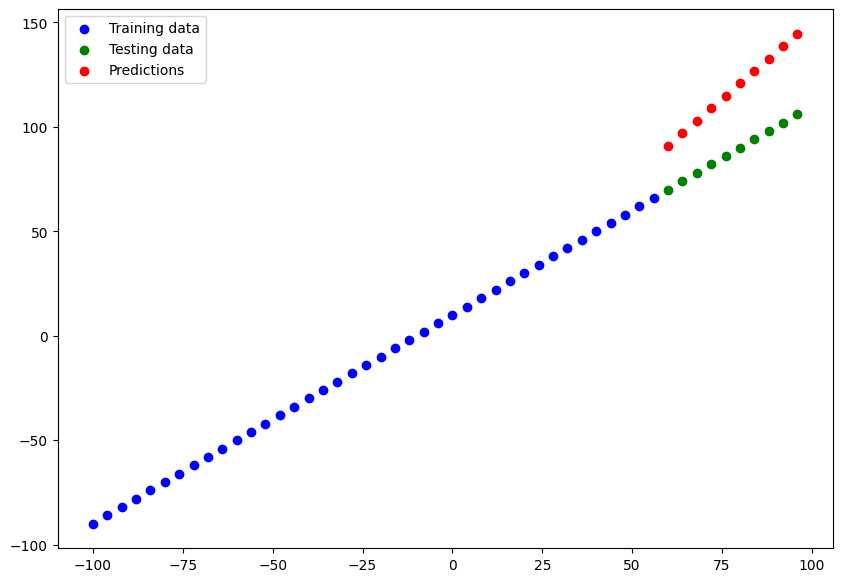

In [ ]:
# Plot the predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
# Find the mse and mae
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.82005>,
 <tf.Tensor: shape=(), dtype=float32, numpy=920.50507>)

**Build `model_3`**

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 47ms/step


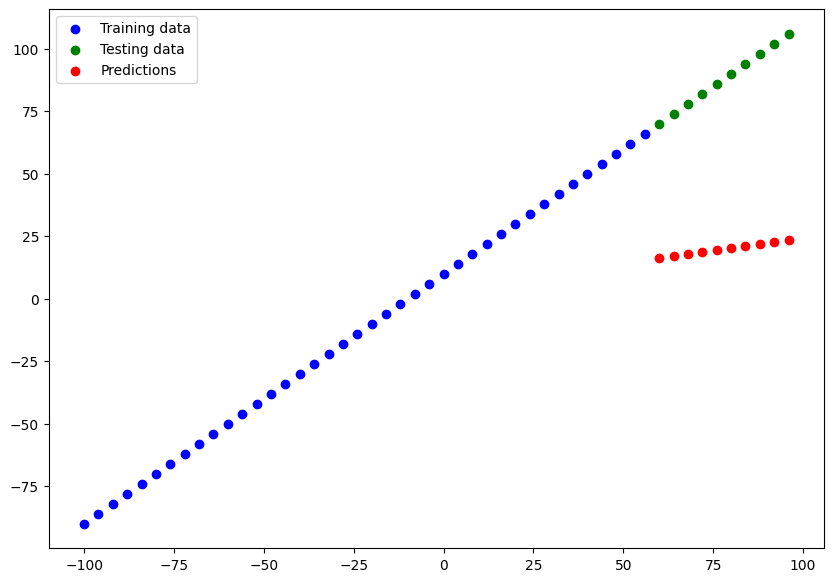

In [ ]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# The metrics of the model
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.132355>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4727.079>)

This is the case of over fitting here as the model cannot generalize but fit only for the training data

> **start with small models and ensure they work build up the complexity if needed**

### Comparing the results of the experiments

In [ ]:
# compare resutls using pandas dataframe
import pandas as pd

In [ ]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],]

all_results = pd.DataFrame(model_results, columns=["Model","MAE","MSE"])
all_results

,Model,MAE,MSE
0,model_1,14.848201,221.287872
1,model_2,29.820049,920.505066
2,model_3,68.132355,4727.079102


Looks like `model_2`  performs the best...

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> One of our main goals is to minimise the time between the experiments. The more experiments you run the more we will figure out what does not work and in turn get cloer to what works.

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

Tools availabe to help with this are:
* TensorBoard - component of the TensorFlow library to help track modelling
* Weights and Biases - a tool for tracking all kinds of machine learning experiments
(pluggs right into TensorBoard)

## Saving our models

This allows us to use the models outside colab to use in applications - web/mobile app/where they are required.

Two main formats of saving the models
1. The SaveModel format
2. The  HDF5 format

In [ ]:
# save model_2 using SaveModel format
model_2.save("Regression_Test_Deep_Learning_Model")

In [ ]:
# saving in HDF5 format
# This is universal fomat with the '.h5' for bigger models
model_2.save("Regression_Test_Deep_Learning_Model_HDF5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# loading in the SaveModel
loaded_SaveModel_format = tf.keras.models.load_model('/content/Regression_Test_Deep_Learning_Model')
loaded_SaveModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The structure is the same now to  check is the weights and biases are the same

In [ ]:
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)
model_2_preds = model_2.predict(X_test)

loaded_SaveModel_format_preds == model_2_preds

1/1 [==============================] - 0s 34ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# loading in the HDF5
loaded_HDF5_format = tf.keras.models.load_model('/content/Regression_Test_Deep_Learning_Model_HDF5.h5')
loaded_HDF5_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# comparing predictions to comfirm model weights preserved
loaded_HDF5_format_preds = loaded_HDF5_format.predict(X_test)
model_2_preds = model_2.predict(X_test)

loaded_HDF5_format_preds == model_2_preds

1/1 [==============================] - 0s 19ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading the files/models locally to the device from Google Colab

If you want to download from colab
1. Right click on the files and right click and download
2. Use code(see the cell below)
3. Save from Google Colab to Google Drive with copy function

In [ ]:
# Download a file from google colab
from google.colab import files
# files.download('{path}')

In [ ]:
# Google colab to Google drive (this requires to mount google drive to colab)
# |cp path_of_file path_in_Google_drive

### A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

>**note:** when learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [ ]:
# required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read the insurance database
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Data preprocessing

In [ ]:
# one hot encoding to remove categoriacal data
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Set the random state
tf.random.set_seed(42)


# create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8609.1172 - mae: 8609.1172
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7884.7129 - mae: 7884.7129
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7560.4653 - mae: 7560.4653
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7600.7690 - mae: 7600.7690
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7728.3145 - mae: 7728.3145
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7645.7188 - mae: 7645.7188
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7595.4839 - mae: 7595.4839
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7720.9072 - mae: 7720.9072
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7525.6904 - mae: 7525.6904
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7769.0298 - mae: 7769.0298

In [ ]:
insurance_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                120       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the results on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6648.4756 - mae: 6648.4756


[6648.4755859375, 6648.4755859375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Imporve the model,
1. Increase number of epochs
2. increase the number of layers with more hidden units

In [ ]:
# Set the random state
tf.random.set_seed(42)


# create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5008.5366 - mae: 5008.5366


[5008.53662109375, 5008.53662109375]

The loss and the mae is `nan` if there are 3 layers .... this causes it to become too complex so we cannot learn any patterns with the current parameters -> so tune the compile part of the code

**Same as above with 300 epochs**

In [ ]:
# Set the random state
tf.random.set_seed(42)


# create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=300, verbose=0)

In [ ]:
# Evaluate `model_3`
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3232.4573 - mae: 3232.4573


[3232.457275390625, 3232.457275390625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6648.4756 - mae: 6648.4756


[6648.4755859375, 6648.4755859375]

Text(0.5, 0, 'epochs')

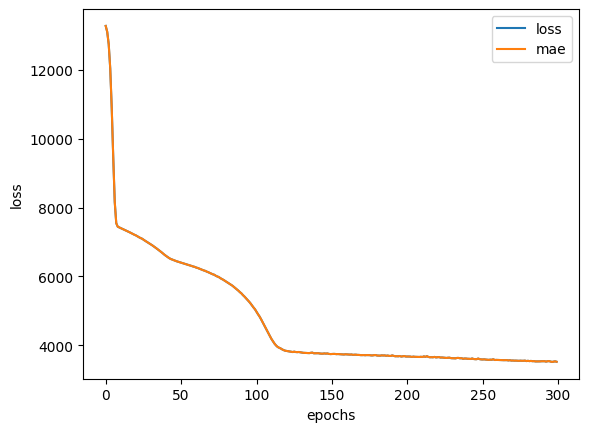

In [ ]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**When to stop training/tuning the hyper parameters**-> tensorflow has **EarlyStopping Callback** (it is a component that stops the training when the model stops improving)

#### Preprocessing the data (Normalization and Standardization)

>***Neural networks tend to prefer normalization***

<Axes: ylabel='Frequency'>

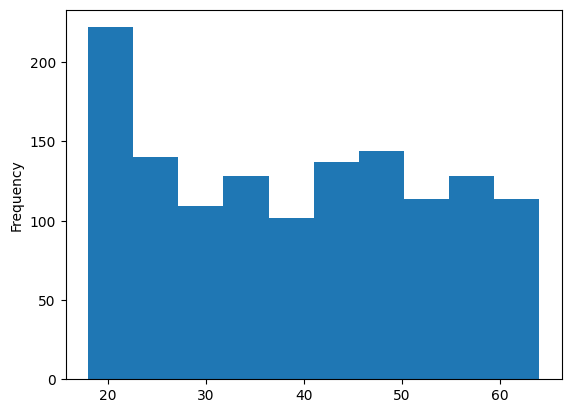

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

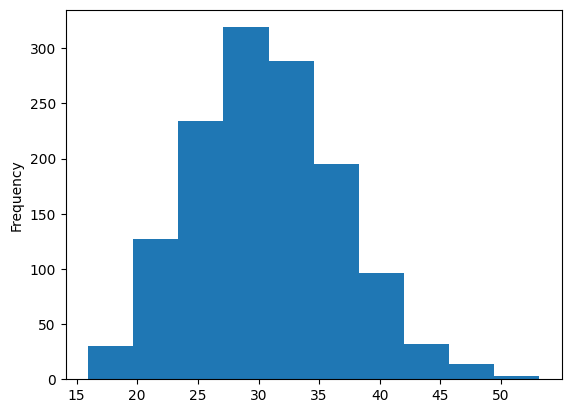

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

If your are not sure on what to use then to try both,
* Normalization -> preserves the overall data
* Standardization -> reduces the effect of the outliers.

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [ ]:
# read the insurance database
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    )

# Create X and y
X = insurance.drop("charges",axis=1)
y =  insurance["charges"]

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the column transformer to out training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
# Transform training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# How does the data look like,
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Shapes of the data
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

The data has been normalised and one hot encoded. Now, lets build a model and fit this data and see the results. (same model as insurance_model_2 but with differenetly treated data)

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])


# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# fit the model
history = insurance_model_4.fit(X_train_normal,y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13343.8369 - mae: 13343.8369
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13336.6475 - mae: 13336.6475
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13318.6240 - mae: 13318.6240
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13279.7979 - mae: 13279.7979
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13208.9854 - mae: 13208.9854
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13095.2295 - mae: 13095.2295
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12928.1572 - mae: 12928.1572
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12697.4316 - mae: 12697.4316
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12392.6416 - mae: 12392.6416
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12007.07

In [ ]:
# Evaluate the model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3440.8508 - mae: 3440.8508


[3440.850830078125, 3440.850830078125]

Text(0, 0.5, 'epochs')

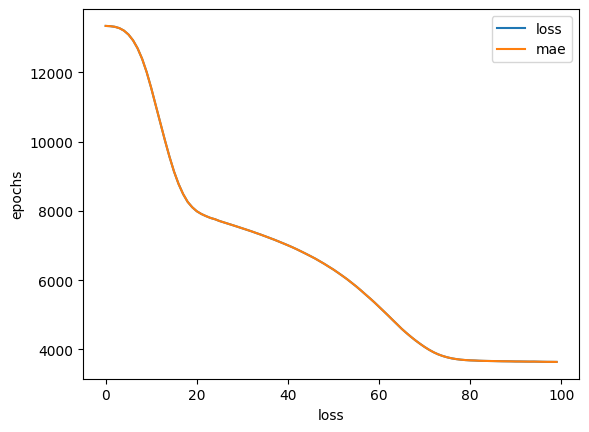

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")